In [9]:
import os

root = "./caltech-101-img"
for cls in ['airplanes', 'ant']:
    path = os.path.join(root, cls)
    print(f"{cls} folder exists:", os.path.exists(path))
    if os.path.exists(path):
        print(f"  -> Total images: {len(os.listdir(path))}")


airplanes folder exists: True
  -> Total images: 800
ant folder exists: True
  -> Total images: 42


In [7]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import VGG16

base = VGG16(
    weights="./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    include_top=False,
    input_shape=(224,224,3)
)


# ---- Freeze base model ----
for layer in base.layers:
    layer.trainable = False

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training and validation
train_gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)

selected_classes = ['airplanes', 'ant']

train_data = train_gen.flow_from_directory(
    "./caltech-101-img",
    target_size=(224,224),
    batch_size=32,
    subset='training',
    classes=selected_classes
)

val_data = train_gen.flow_from_directory(
    "./caltech-101-img",
    target_size=(224,224),
    batch_size=32,
    subset='validation',
    classes=selected_classes
)


# ---- Add Classifier on top of base model ----
model = Sequential([
    base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_data.num_classes, activation='softmax')
])

# ---- Compile (train only new layers) ----
model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


# ---- Train ----
model.fit(train_data, validation_data=val_data, epochs=5)

loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")



# Get a batch of validation images
images, labels = next(val_data)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Display some samples with predictions
plt.figure(figsize=(15, 10))
for i in range(min(9, len(images))):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {selected_classes[true_classes[i]]}\nPred: {selected_classes[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print accuracy for this batch
correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


ValueError: The PyDataset has length 0

In [10]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [11]:
from tensorflow.keras.applications import VGG16

base = VGG16(
    weights="./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    include_top=False,
    input_shape=(224,224,3)
)


In [12]:

# ---- Freeze base model ----
for layer in base.layers:
    layer.trainable = False


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training and validation
train_gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)

selected_classes = ['airplanes', 'ant', 'camera', 'chair']

train_data = train_gen.flow_from_directory(
    "./caltech-101-img",
    target_size=(224,224),
    batch_size=32,
    subset='training',
    classes=selected_classes
)

val_data = train_gen.flow_from_directory(
    "./caltech-101-img",
    target_size=(224,224),
    batch_size=32,
    subset='validation',
    classes=selected_classes
)


Found 764 images belonging to 4 classes.
Found 190 images belonging to 4 classes.


In [14]:

# ---- Add Classifier on top of base model ----
model = Sequential([
    base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_data.num_classes, activation='softmax')
])

# ---- Compile (train only new layers) ----
model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [15]:

# ---- Train ----
model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.8442 - loss: 0.7708 - val_accuracy: 0.9579 - val_loss: 0.0754
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9712 - loss: 0.0922 - val_accuracy: 0.9947 - val_loss: 0.0221
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9908 - loss: 0.0239 - val_accuracy: 0.9947 - val_loss: 0.0302
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9935 - loss: 0.0121 - val_accuracy: 0.9947 - val_loss: 0.0201
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9948 - loss: 0.0100 - val_accuracy: 0.9947 - val_loss: 0.0347


In [16]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9947 - loss: 0.0347
Validation Loss: 0.0347
Validation Accuracy: 0.9947


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


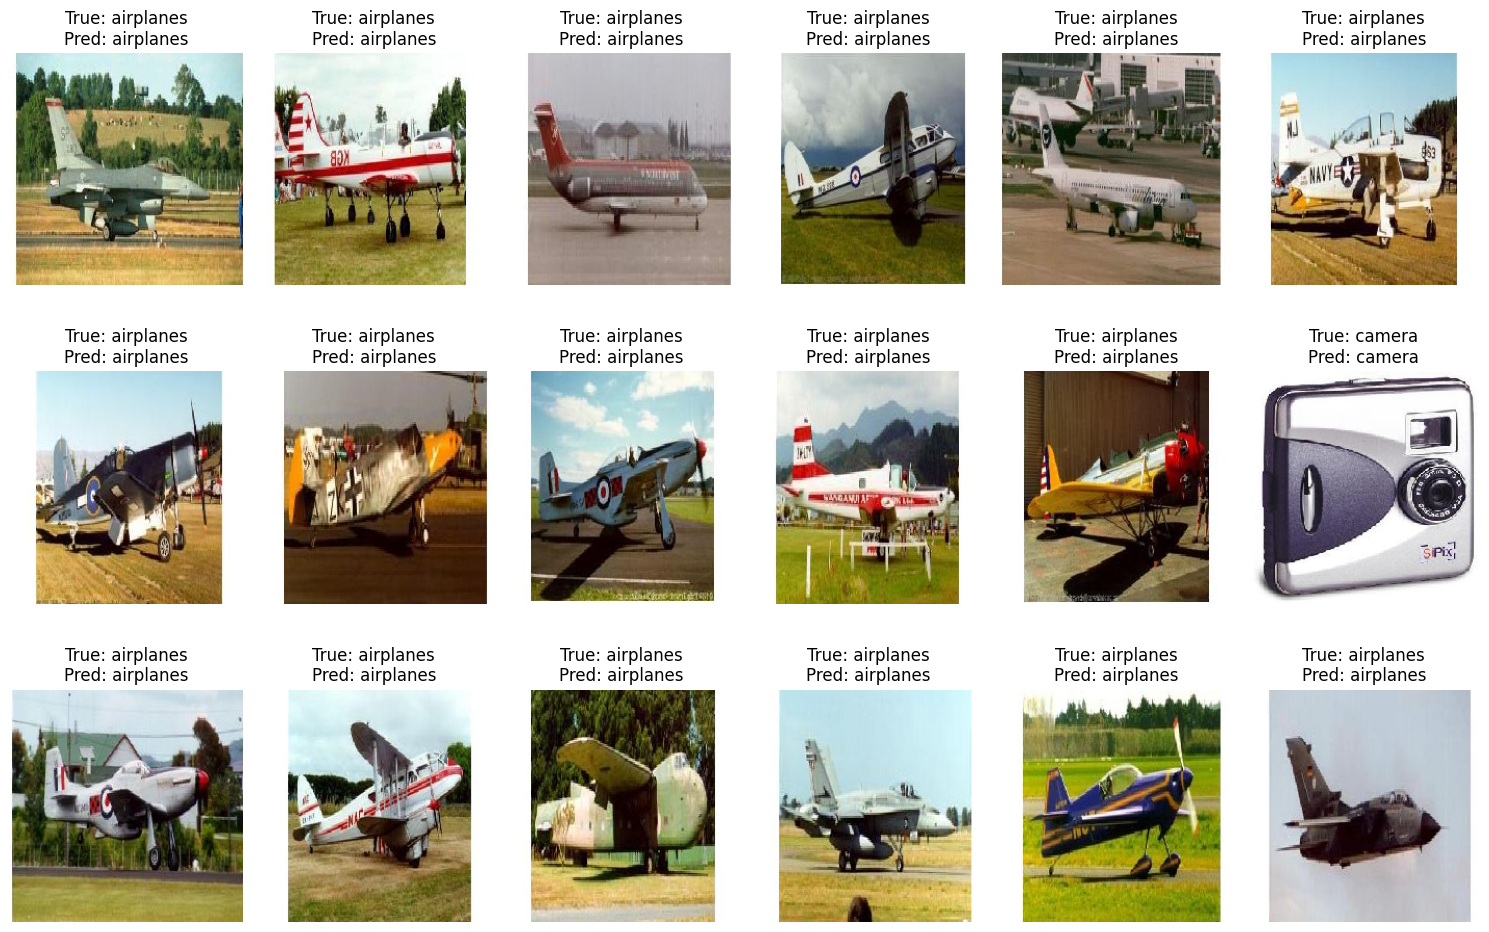


Batch Accuracy: 32/32 = 100.00%


In [19]:
import numpy as np

import matplotlib.pyplot as plt

# Get a batch of validation images
images, labels = next(val_data)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Display some samples with predictions
plt.figure(figsize=(15, 10))
for i in range(min(18, len(images))):
    plt.subplot(3, 6, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {selected_classes[true_classes[i]]}\nPred: {selected_classes[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print accuracy for this batch
correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")